# Example 7.2 Cross-spectral density of wind



<img src="./figures/Fig_coherence_bridge.png">

The wind is modelled as three components: u,v and w. Let's consider the cross-correlation of the wind in two different points.

$$R_{u_1 u_2}(\tau)=\text{E}[ u_1(t) u_2(t+\tau)]$$.

We know that this can be interpreted in the frequency-domain as a cross-spectral density:

$$ S_{u_1 u_2}(\omega)=\dfrac{1}{2 \pi}
\int_{-\infty}^{\infty}
R_{u_1 u_2}(\tau) \exp({-i \omega \tau}) \: \text{d} \tau$$


We often assume that the wind field is homogeneous. This implies that the statistical properties (mean, standard deviation, spectral density) are equal in all points and that the correlation is just dependent on the spatial separation between the two points $\Delta x=|x_1-x_2|$:

$$R_{u}(\tau,\Delta x)=\text{E}[ u(t,x_1) u(t+\tau,x_2)]$$.

$$ S_u(\omega,\Delta x)=
\dfrac{1}{2 \pi}
\int_{-\infty}^{\infty}
R_{u}(\tau,\Delta x) \exp({-i \omega \tau}) \: \text{d} \tau$$

The cross-spectral density can be expressed by the normalized co-spectrum $\hat{\text{Co}}(\omega,\Delta x)$: 

$$ S_u(\omega,\Delta x)=S_u(\omega) \hat{\text{Co}}(\omega,\Delta x)$$

This means that the cross-spectral density matrix of the two components $u_1$ and $u_2$ can be written as follows:

$$
\mathbf{S}_u(\omega) = 
\left[ \begin{array}{c c c}
\mathbf{S}_{u_1}(\omega) & \mathbf{S}_{u_1 u_2}(\omega) \\
\mathbf{S}_{u_2 u_1}(\omega) & \mathbf{S}_{u_1}(\omega)
\end{array} \right]
=
\left[ \begin{array}{c c c}
\mathbf{S}_{u}(\omega) & \mathbf{S}_{u}(\omega)\hat{\text{Co}}(\omega,\Delta x) \\
\mathbf{S}_{u}(\omega)\hat{\text{Co}}(\omega,\Delta x) & \mathbf{S}_{u}(\omega)
\end{array} \right]
$$

Thus, $\hat{\text{Co}}(\omega,\Delta x)$ describes to what extent the wind turbulence is correlated with respect to frequency and separation.

A useful analogy can be the correlation coefficient in the covariance matrix: 
$$
\mathbf{\Sigma} = 
\left[ \begin{array}{c c }
\sigma_1^2 & \sigma_{12} \\
\sigma_{21} & \sigma_{2}^2 \\
\end{array} \right]
=
\left[ \begin{array}{c c}
\sigma_1^2 & \rho_{12} \sqrt{\sigma_1^2 \sigma_2^2} \\
\rho_{21} \sqrt{\sigma_1^2 \sigma_2^2} & \sigma_{2}^2 \\
\end{array} \right]
$$



Typically, we use a model on the form:

$$\hat{\text{Co}}(\omega,\Delta x)
=\exp(-K \frac{\Delta x \omega}{V})
$$

where $K$ is a constant and $V$ is the mean wind speed.




## Question 1: Find the coherence of the wind time series from the Hardanger bridge

### Import and plot the Hardanger wind data

The data is imported from the text file. The coordinates of the measurement points are $x_1=180$,$x_2=200$,$x_3=240$.


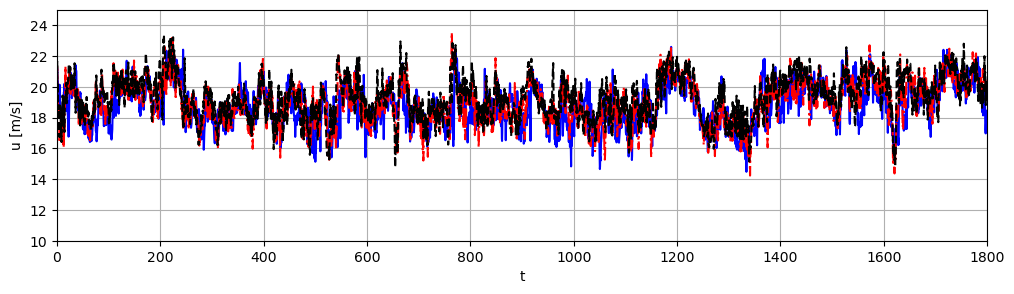

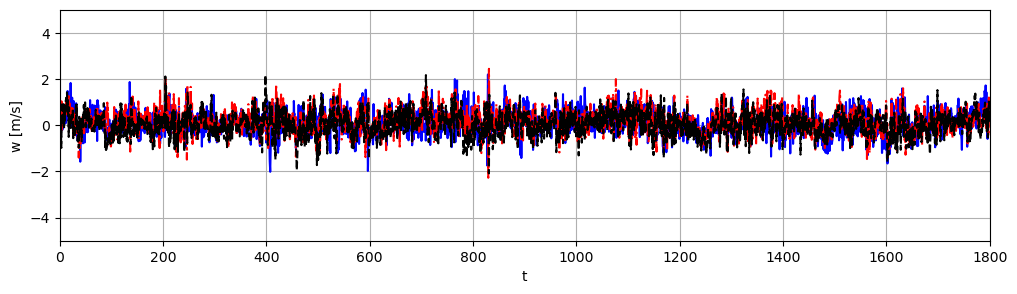

In [64]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy import signal as spsi

# Import data x1, y1, and z1
wind_labels=np.loadtxt('data/wind_data.txt',delimiter=',',skiprows=0, max_rows=1, dtype=str) 

wind=np.loadtxt('data/wind_data.txt',delimiter=',',skiprows=1).T

u=wind[0:3,:]
w=wind[6:,:]


fs=3 # sample rate is 3 Hz
dt=1/fs

t=np.arange(0,wind.shape[1]*dt,dt) # make time vector


plt.figure(figsize=(12,3))
plt.plot(t,u[0,:],'-',color='b',label='u1')
plt.plot(t,u[1,:],'-.',color='r',label='u2')
plt.plot(t,u[2,:],'--',color='k',label='u3')

plt.xlabel('t')
plt.ylabel('u [m/s]')
plt.xlim(0,1800)
plt.ylim(10,25)
plt.grid()

#plt.xlim(400,1000)

plt.figure(figsize=(12,3))
plt.plot(t,w[0,:],'-',color='b',label='w1')
plt.plot(t,w[1,:],'-.',color='r',label='w2')
plt.plot(t,w[2,:],'--',color='k',label='w3')

plt.xlabel('t')
plt.ylabel('w [m/s]')
plt.xlim(0,1800)
plt.ylim(-5,5)
plt.grid()

#plt.xlim(600,900)



In [65]:
# Correlation matrix
Cu=np.corrcoef(u)
print(Cu)

# Correlation matrix
Cw=np.corrcoef(w)
print(Cw)

[[1.         0.61106356 0.52730664]
 [0.61106356 1.         0.77726839]
 [0.52730664 0.77726839 1.        ]]
[[1.         0.197873   0.1297399 ]
 [0.197873   1.         0.39574156]
 [0.1297399  0.39574156 1.        ]]


### Spectral densities

We estimate the cross-spectral densities using the Welch method.

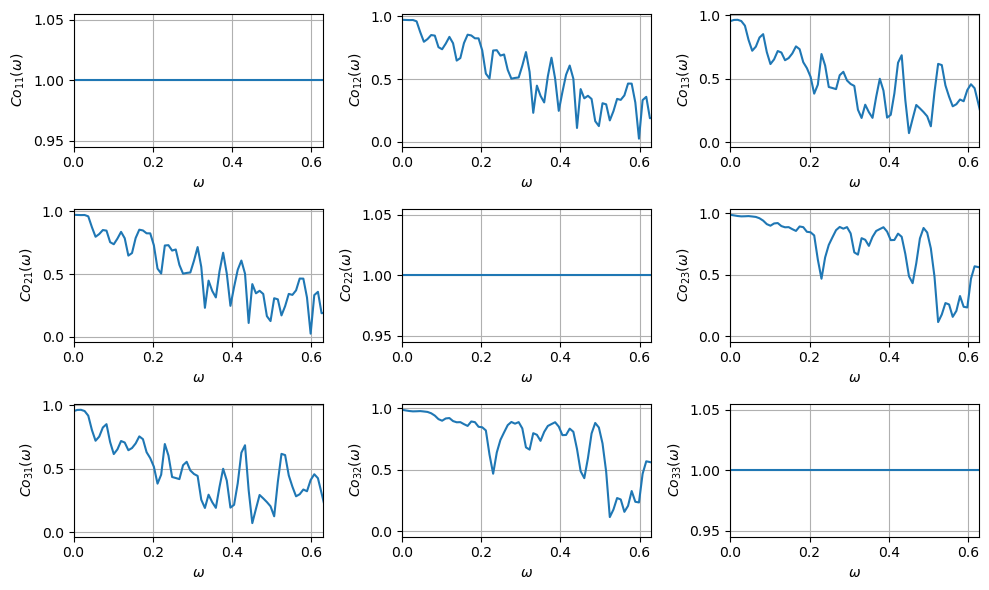

In [66]:
# Welch estimate of cross-spectral density

import scipy

Ndivisions=5 # Number of divisions of the time series
Nwindow=np.ceil(len(t)/Ndivisions) # Length of window
Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow))) # Next power of 2

# Spectral matrix
S_welch=np.zeros((3,3,np.int32(Nfft_pow2/2+1)),dtype=np.complex_)

# Fill spectral matrix by taking the cross spectral density between each of the 3 time series
for k1 in range(3):
    for k2 in range(3):
            f, S_Hz=scipy.signal.csd(u[k1,:],u[k2,:], fs=1/dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
            
            w_welch=f*2*np.pi # Frequency axis in rad/s
            S_welch[k1,k2,:]=S_Hz/(2*np.pi) # Spectrum in rad/s
            
# Plot spectrum
fig, axs = plt.subplots(3,3,figsize=(10,6))    
for k1 in range(3):
    for k2 in range(3):
        ax = axs[k1,k2]
        #ax.plot(w_welch,np.real(S_welch[k1,k2,:]))
        #ax.plot(w_welch,np.imag(S_welch[k1,k2,:]))
        
        ax.plot(w_welch,np.abs(S_welch[k1,k2,:]/np.sqrt(S_welch[k1,k1,:]*S_welch[k2,k2,:])))
        
        ax.set_ylabel(('$Co_{' + str(k1+1) + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
        #if k1==k2:
        #ax.set_yscale('log')
        ax.set_xlim(0,0.1*2*np.pi)
plt.tight_layout()